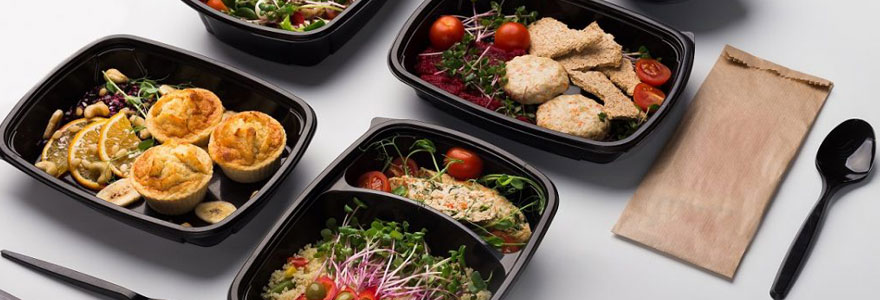

# Project Uber Pickups in New-York City

#### We have two ways of grouping points in space, based on our data : Kmeans and DBSCAN.
####These two models are unsupervised learning because they don't need a target variable : 

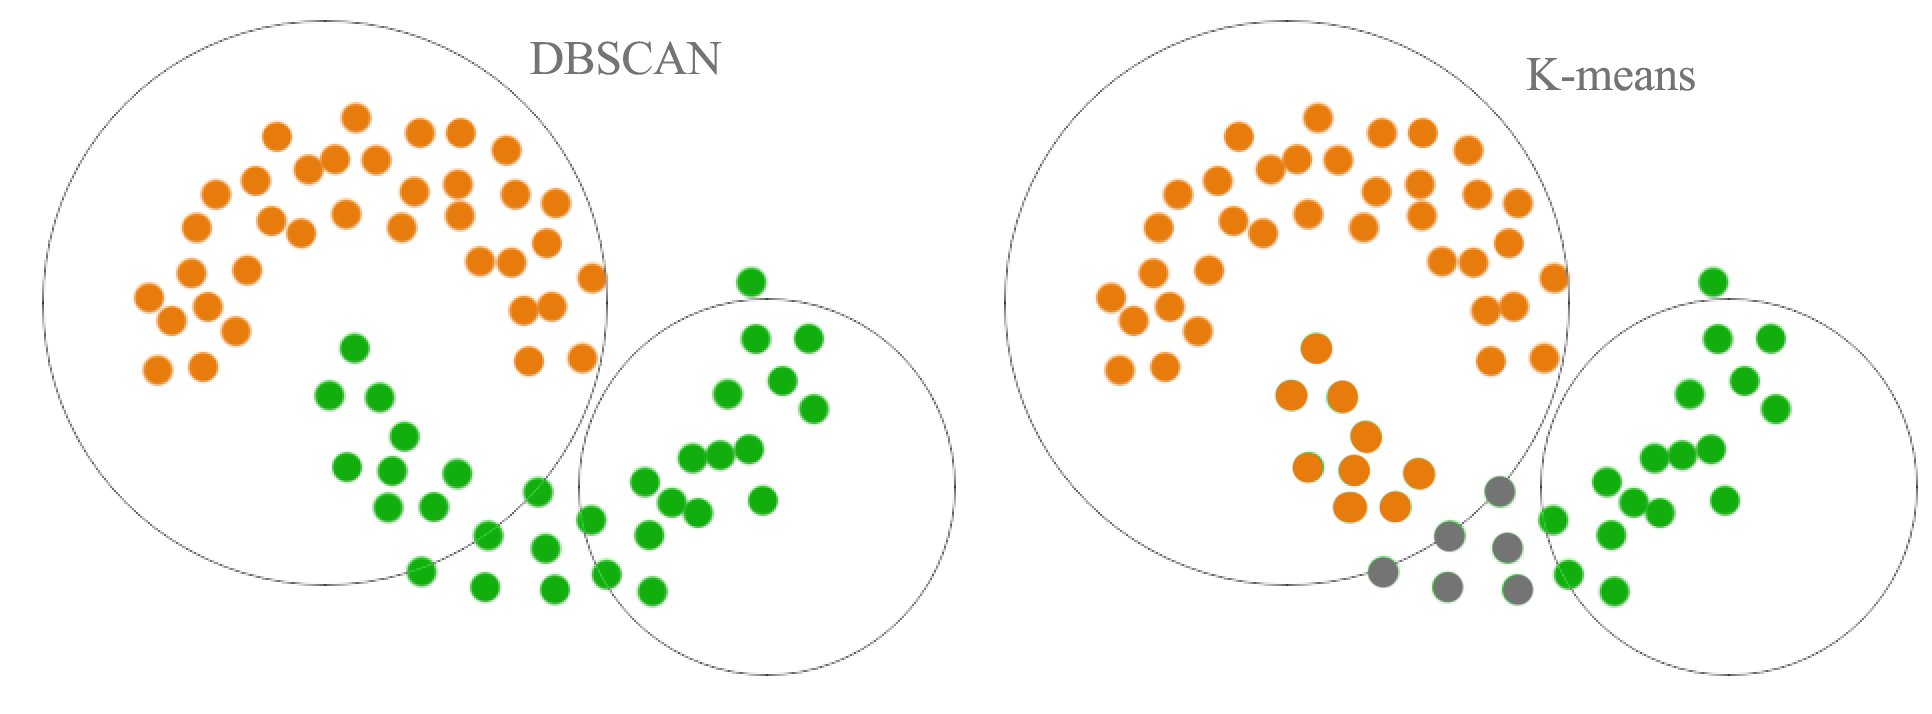

#### **Kmeans** is a technique that separates observations into K groups (K is chosen by the data scientist) where each group is determined by a central point (the average of the cluster) and the distance between each point and the other.
#### **DBSCAN** is an another method for clustering the points in space. In contrast to Kmeans, DBSCAN relies on the density of points in the observation space.

#### During this project, we're going to look at a dataset on the delivery points of the company *Uber eat* in New-York city in the United States. We're going to use these two unsupervised learning models and, based on the results obtained, determine which is the best model for retrieve informations of these data.

## PART I : Analysis on dataset

#### First, we want to observe the data. For that, we start by importing the libraries that allow to visualise the dataset.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Import dataset for a github source
dataset = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")
dataset.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

#### In this dataset, we have informations about the position and the day of each delivery. For increase the number of information, we want to separate the delivery according to the day of week, the day of each month and the hour per day. For that, we use a function of pandas : to_datetime()

In [ ]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])

In [ ]:
dataset["days_week"] = dataset["Date/Time"].dt.dayofweek
dataset['day'] = dataset['Date/Time'].dt.day
dataset['hour'] = dataset['Date/Time'].dt.hour
dataset['minute'] = dataset['Date/Time'].dt.minute

In [ ]:
dataset.head()

Date/Time      Lat      Lon    Base  days_week  day  hour  minute
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512          1    1     0      11
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512          1    1     0      17
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512          1    1     0      21
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512          1    1     0      28
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512          1    1     0      33

#### After the separation, we use "seaborn" for graphics : 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


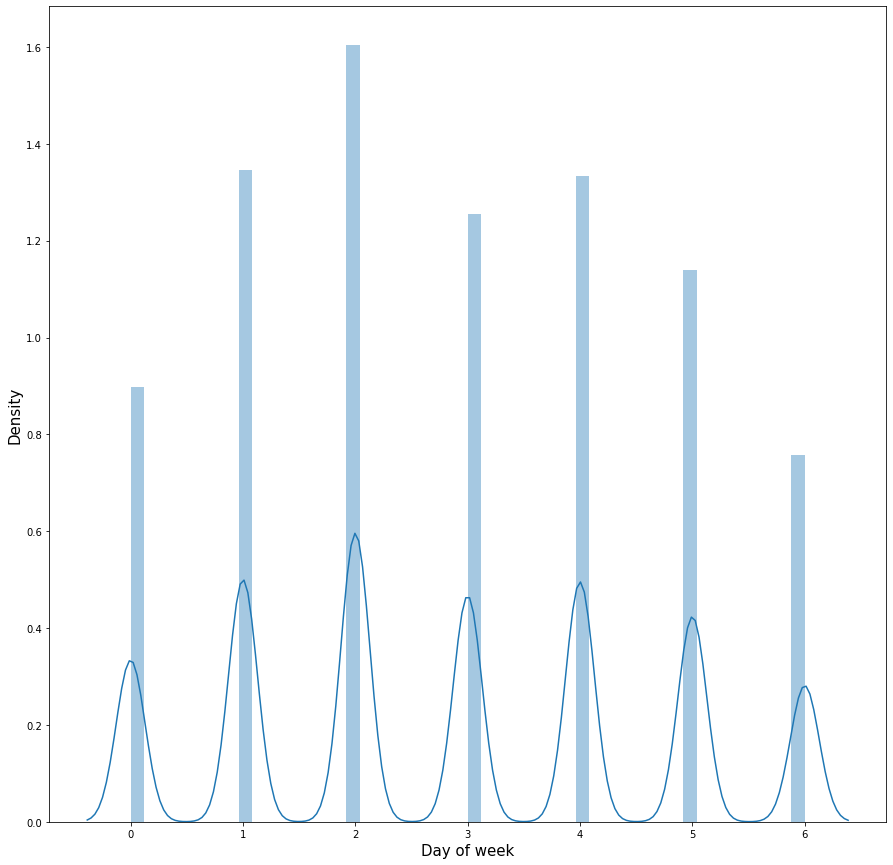

In [ ]:
import seaborn as sns
plt.subplots(figsize = (15,15))
sns.distplot(dataset.days_week)
plt.xlabel("Day of week", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show();

####In this barplot, we can see the density of delivery according to day of week. It seems that there are more deliveries on day 2 of the week.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


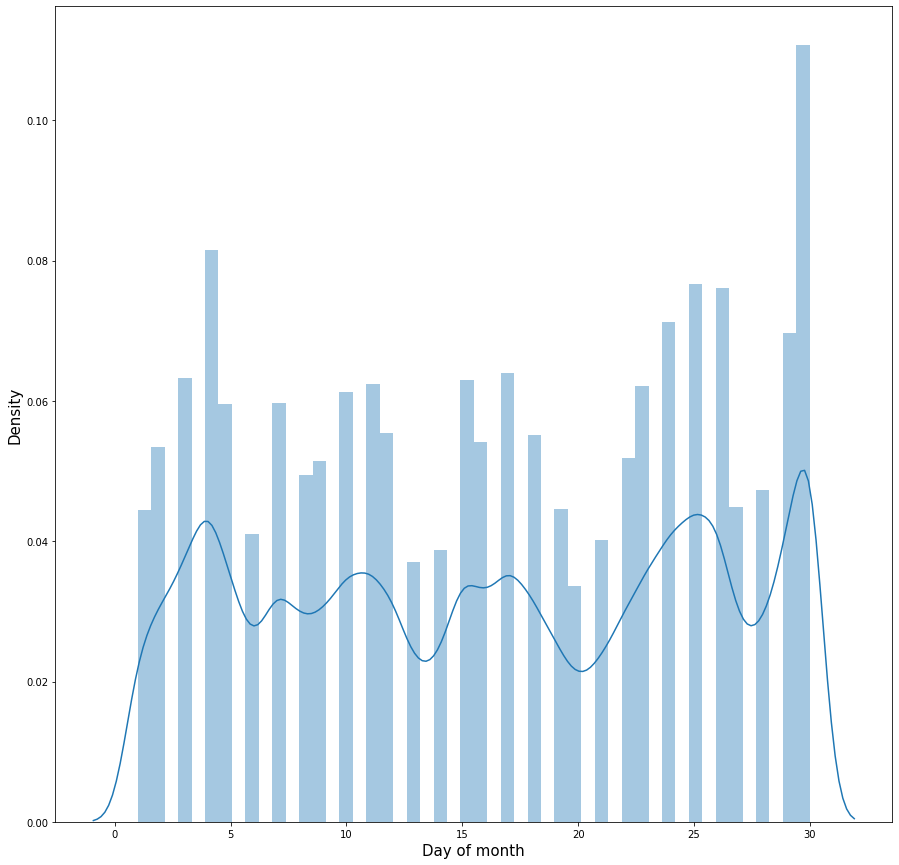

In [ ]:
plt.subplots(figsize = (15,15))
sns.distplot(dataset.day)
plt.xlabel("Day of month", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show();

####In this barplot, we can see the density of delivery according to day of month. It seems that the number of delivery increase at the end of the month.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


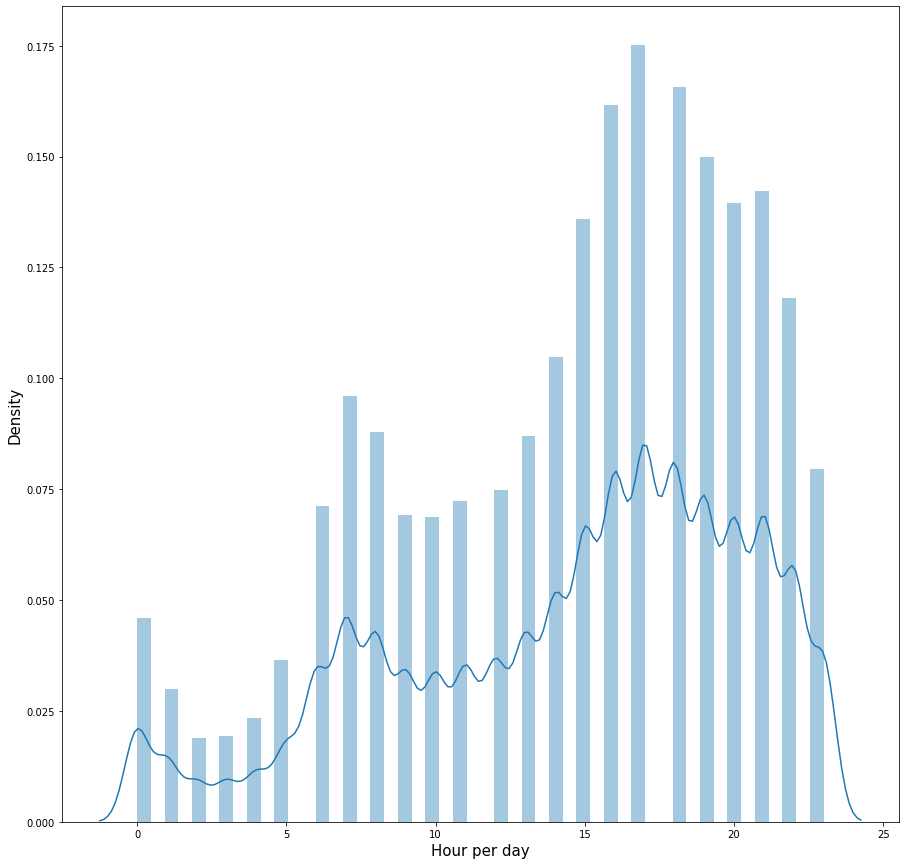

In [ ]:
plt.subplots(figsize = (15,15))
sns.distplot(dataset.hour)
plt.xlabel("Hour per day", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show();

####Here, we have an another way to observe the number of customers orders. Every day, customers order more on Uber eat between 3 p.m and 10 p.m.

## PART II : Graphic representation of the 2 models of unsupervised learning

### **1 - Kmeans**

#### We want to use Kmeans for clustering these data. First, we use this model for clustering each delivery. Second, we observe the evolution of each cluster according to the separation of data.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(4) 
# We use 4 Kmeans cluster (n_clusters = 4) for this dataset (it's just an example).
dataset_sample = dataset.sample(20000) # We only use a sample of 20000 data items to reduce treatment latency.
X = dataset_sample.iloc[:, 1:3]
kmeans.fit(X)
dataset_sample["Kmeans_cluster"] = kmeans.predict(X) # This line of code allows to determine which cluster according to the data.

In [ ]:
dataset_sample.head()

Date/Time      Lat      Lon  ... hour  minute  Kmeans_cluster
452443 2014-04-17 16:13:00  40.8092 -73.9538  ...   16      13               0
451701 2014-04-17 14:38:00  40.7291 -74.0010  ...   14      38               1
21404  2014-04-18 22:47:00  40.7076 -73.9433  ...   22      47               1
127663 2014-04-18 13:39:00  40.7612 -73.9735  ...   13      39               0
550101 2014-04-30 18:31:00  40.7495 -73.9954  ...   18      31               0

[5 rows x 9 columns]

#### With a sample egal to 20000 data, we cannot analyse the data according to the months of the year because we don't have enough observations. 

####After performing the Kmeans model on our data, we obtain a clustering result for each data. In order to observe our different clusters, we're going to observe these clusters using the plotly.express library.

#### Before that, we separate the data in relation to the day of delivery.

In [ ]:
result_nothing = dataset_sample
result_days_week = dataset_sample.sort_values("days_week")
result_day = dataset_sample.sort_values("day")
result_hour = dataset_sample.sort_values("hour")

In [ ]:
print("The dataset with cluster is : ")
display(result_nothing)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by days of the week is : ")
display(result_days_week)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by days of month is : ")
display(result_day)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by hour of day is : ")
display(result_hour)

dataset_sample["Kmeans_cluster"] = kmeans.predict(X)

The dataset with cluster is : 


Date/Time      Lat      Lon  ... hour  minute  Kmeans_cluster
452443 2014-04-17 16:13:00  40.8092 -73.9538  ...   16      13               0
451701 2014-04-17 14:38:00  40.7291 -74.0010  ...   14      38               1
21404  2014-04-18 22:47:00  40.7076 -73.9433  ...   22      47               1
127663 2014-04-18 13:39:00  40.7612 -73.9735  ...   13      39               0
550101 2014-04-30 18:31:00  40.7495 -73.9954  ...   18      31               0
...                    ...      ...      ...  ...  ...     ...             ...
91757  2014-04-11 20:59:00  40.7219 -73.6507  ...   20      59               3
503029 2014-04-25 00:45:00  40.7188 -74.0087  ...    0      45               1
384754 2014-04-08 04:21:00  40.6981 -73.9964  ...    4      21               1
5090   2014-04-04 18:55:00  40.7137 -74.0089  ...   18      55               1
417348 2014-04-12 13:38:00  40.7337 -73.9949  ...   13      38               1

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by days of the week is : 


Date/Time      Lat      Lon  ... hour  minute  Kmeans_cluster
428011 2014-04-14 05:32:00  40.7314 -74.0041  ...    5      32               1
8825   2014-04-07 19:08:00  40.7492 -73.9758  ...   19       8               0
379988 2014-04-07 16:35:00  40.7076 -74.0100  ...   16      35               1
67863  2014-04-07 15:11:00  40.6450 -73.7818  ...   15      11               3
527256 2014-04-28 02:14:00  40.7193 -73.9858  ...    2      14               1
...                    ...      ...      ...  ...  ...     ...             ...
7414   2014-04-06 14:26:00  40.7754 -73.9841  ...   14      26               0
99208  2014-04-13 00:42:00  40.7637 -73.9856  ...    0      42               0
311841 2014-04-27 13:02:00  40.8931 -73.8997  ...   13       2               0
189488 2014-04-27 17:16:00  40.7685 -73.9615  ...   17      16               0
311525 2014-04-27 10:26:00  40.6803 -73.9723  ...   10      26               1

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by days of month is : 


Date/Time      Lat      Lon  ... hour  minute  Kmeans_cluster
329368 2014-04-01 14:01:00  40.7874 -73.9679  ...   14       1               0
329270 2014-04-01 13:44:00  40.7284 -74.0071  ...   13      44               1
219226 2014-04-01 07:15:00  40.7032 -73.9907  ...    7      15               1
37730  2014-04-01 16:55:00  40.6448 -73.7820  ...   16      55               3
331040 2014-04-01 17:51:00  40.7632 -73.9767  ...   17      51               0
...                    ...      ...      ...  ...  ...     ...             ...
215362 2014-04-30 19:26:00  40.7399 -73.9933  ...   19      26               0
321785 2014-04-30 11:06:00  40.7637 -73.9676  ...   11       6               0
548467 2014-04-30 16:57:00  40.7577 -73.9858  ...   16      57               0
206317 2014-04-30 07:04:00  40.8247 -73.9225  ...    7       4               0
206803 2014-04-30 07:58:00  40.7667 -73.9789  ...    7      58               0

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by hour of day is : 


Date/Time      Lat      Lon  ... hour  minute  Kmeans_cluster
266322 2014-04-14 00:43:00  40.7303 -74.0046  ...    0      43               1
316054 2014-04-29 00:05:00  40.7487 -73.9873  ...    0       5               0
62072  2014-04-06 00:13:00  40.6969 -73.9364  ...    0      13               1
145130 2014-04-22 00:43:00  40.7828 -73.8154  ...    0      43               3
112976 2014-04-16 00:43:00  40.7064 -74.0094  ...    0      43               1
...                    ...      ...      ...  ...  ...     ...             ...
229948 2014-04-03 23:24:00  40.7277 -74.0003  ...   23      24               1
15004  2014-04-12 23:13:00  40.7090 -74.0118  ...   23      13               1
175807 2014-04-25 23:45:00  40.7293 -73.9871  ...   23      45               1
260561 2014-04-11 23:19:00  40.7195 -74.0042  ...   23      19               1
5640   2014-04-04 23:47:00  40.6914 -73.9258  ...   23      47               1

[20000 rows x 9 columns]

####After the treatment and the prediction of the model, it's necessary to obtain a graphic result (with plotly.express) : 

In [ ]:
import plotly.express as px

px.scatter_mapbox(result_nothing, lat="Lat", lon="Lon", color="Kmeans_cluster", zoom=11, mapbox_style="carto-positron", title = "Clustering all of datasets with Kmeans")

In [ ]:
px.scatter_mapbox(result_days_week, lat="Lat", lon="Lon", color="Kmeans_cluster", animation_frame = "days_week", zoom=11, mapbox_style="carto-positron", title = "Evolution (day of week) of clustering with Kmeans")

In [ ]:
px.scatter_mapbox(result_day, lat="Lat", lon="Lon", color="Kmeans_cluster", animation_frame = "day", zoom=11, mapbox_style="carto-positron", title = "Evolution (day of month) of clustering with Kmeans")

In [ ]:
px.scatter_mapbox(result_hour, lat="Lat", lon="Lon", color="Kmeans_cluster", animation_frame = "hour", zoom=11, mapbox_style="carto-positron", title = "Evolution (hour of day) of clustering with Kmeans")

#### In the parameters of the Kmeans model, we automatically generated 4 clusters, distributed according to the position of the points in space. 

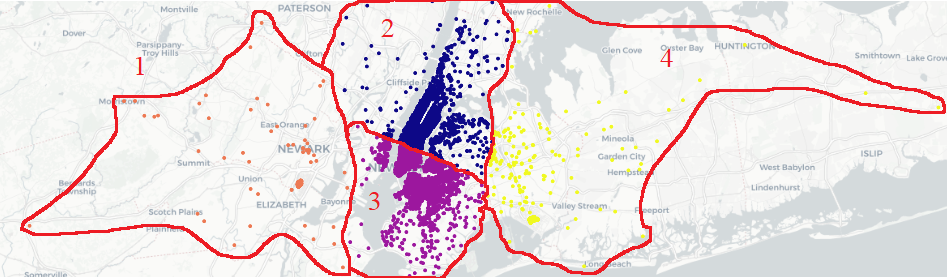

#### The model was able to distribute these 4 clusters automatically on the city map. However, it doesn't give relevant information on the areas of New York that have the most demand for deliveries. Obtention of this information would be more relevant for the uber-eat company. That's why we use another model, DBSCAN.

### **2 - DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
# We take an eps = 0.015 to have a reasonable number of clusters
dbscan = DBSCAN(eps = 0.015)
# eps is the most important DBSCAN parameter. It represent the maximum distance between two samples for one to be considered as in the neighborhood of the other (source : sklearn.cluster.DBSCAN).
#The second most important DBSCAN parameter is min_sample. This parameter determines the minimum number of points required to form a cluster. Without giving min_samples, sklearn automatically gives 5.
dataset_sample = dataset.sample(20000)
X = dataset_sample.iloc[:, 1:3]
dataset_sample["dbscan_cluster"] = dbscan.fit_predict(X)

In [ ]:
dataset_sample["dbscan_cluster"].unique()

array([ 0, -1,  1,  2,  3,  4])

#### The model automatically generated 6 clusters, distributed according to the density of the points on the map.
#### Now, we separate the data in according to the value time (like with Kmeans)

In [ ]:
result_nothing = dataset_sample
result_days_week = dataset_sample.sort_values("days_week")
result_day = dataset_sample.sort_values("day")
result_hour = dataset_sample.sort_values("hour")

In [ ]:
print("The dataset with cluster is : ")
display(result_nothing)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by days of the week is : ")
display(result_days_week)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by days of month is : ")
display(result_day)
print("\t")
print("_________________________________________")
print("The dataset with cluster grouped by hour of day is : ")
display(result_hour)

The dataset with cluster is : 


Date/Time      Lat      Lon  ... hour  minute  dbscan_cluster
518857 2014-04-26 19:25:00  40.7222 -73.9967  ...   19      25               0
181033 2014-04-26 17:41:00  40.7695 -73.9600  ...   17      41               0
121771 2014-04-17 16:13:00  40.7534 -73.9781  ...   16      13               0
183844 2014-04-26 21:44:00  40.6753 -73.9534  ...   21      44               0
412109 2014-04-11 18:09:00  40.7408 -74.0071  ...   18       9               0
...                    ...      ...      ...  ...  ...     ...             ...
509781 2014-04-25 20:24:00  40.7204 -73.9939  ...   20      24               0
162054 2014-04-24 16:14:00  40.7219 -73.9998  ...   16      14               0
154679 2014-04-23 16:19:00  40.7639 -73.9712  ...   16      19               0
364301 2014-04-05 15:04:00  40.7220 -73.9972  ...   15       4               0
81987  2014-04-10 09:36:00  40.7393 -73.9828  ...    9      36               0

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by days of the week is : 


Date/Time      Lat      Lon  ... hour  minute  dbscan_cluster
66328  2014-04-07 07:03:00  40.8092 -73.9538  ...    7       3               0
528730 2014-04-28 09:03:00  40.7532 -73.9918  ...    9       3               0
106012 2014-04-14 20:05:00  40.7937 -73.9744  ...   20       5               0
376461 2014-04-07 05:58:00  40.6732 -73.9829  ...    5      58               0
478993 2014-04-21 20:32:00  40.7646 -73.9807  ...   20      32               0
...                    ...      ...      ...  ...  ...     ...             ...
525149 2014-04-27 15:58:00  40.7249 -73.9991  ...   15      58               0
373196 2014-04-06 13:43:00  40.7603 -73.9784  ...   13      43               0
102025 2014-04-13 19:00:00  40.7448 -73.9739  ...   19       0               0
137619 2014-04-20 08:56:00  40.7505 -73.9948  ...    8      56               0
373819 2014-04-06 15:44:00  40.7264 -73.9918  ...   15      44               0

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by days of month is : 


Date/Time      Lat      Lon  ... hour  minute  dbscan_cluster
231    2014-04-01 09:35:00  40.7526 -73.9750  ...    9      35               0
329927 2014-04-01 15:39:00  40.6449 -73.7821  ...   15      39               1
327797 2014-04-01 07:42:00  40.7842 -73.9787  ...    7      42               0
328341 2014-04-01 09:16:00  40.7136 -74.0061  ...    9      16               0
330414 2014-04-01 16:39:00  40.7746 -73.9520  ...   16      39               0
...                    ...      ...      ...  ...  ...     ...             ...
206044 2014-04-30 06:26:00  40.7120 -73.9629  ...    6      26               0
321936 2014-04-30 11:42:00  40.7589 -73.9816  ...   11      42               0
545263 2014-04-30 12:44:00  40.7461 -73.9417  ...   12      44               0
547943 2014-04-30 16:27:00  40.7522 -73.9919  ...   16      27               0
211619 2014-04-30 15:54:00  40.7719 -73.9615  ...   15      54               0

[20000 rows x 9 columns]

	
_________________________________________
The dataset with cluster grouped by hour of day is : 


Date/Time      Lat      Lon  ... hour  minute  dbscan_cluster
522028 2014-04-27 00:25:00  40.7252 -73.9923  ...    0      25               0
185834 2014-04-27 00:38:00  40.7182 -73.9552  ...    0      38               0
427694 2014-04-14 00:02:00  40.6449 -73.7823  ...    0       2               1
522165 2014-04-27 00:41:00  40.6922 -73.9316  ...    0      41               0
370595 2014-04-06 00:37:00  40.7032 -73.9907  ...    0      37               0
...                    ...      ...      ...  ...  ...     ...             ...
185382 2014-04-26 23:53:00  40.7271 -73.9797  ...   23      53               0
175498 2014-04-25 23:20:00  40.7401 -74.0060  ...   23      20               0
145049 2014-04-21 23:22:00  40.7643 -73.9850  ...   23      22               0
326713 2014-04-30 23:18:00  40.7743 -73.8733  ...   23      18               0
272829 2014-04-15 23:13:00  40.7618 -73.9841  ...   23      13               0

[20000 rows x 9 columns]

In [ ]:
px.scatter_mapbox(result_nothing, lat="Lat", lon="Lon", color="dbscan_cluster", zoom=11, mapbox_style="carto-positron", title = "Clustering all of datasets with DBSCAN")

In [ ]:
px.scatter_mapbox(result_days_week, lat="Lat", lon="Lon", color="dbscan_cluster", animation_frame = "days_week", zoom=11, mapbox_style="carto-positron", title = "Evolution (day of week) of clustering with DBSCAN")

In [ ]:
px.scatter_mapbox(result_day, lat="Lat", lon="Lon", color="dbscan_cluster", animation_frame = "day", zoom=11, mapbox_style="carto-positron", title = "Evolution (day of month) of clustering with DBSCAN")

In [ ]:
px.scatter_mapbox(result_hour, lat="Lat", lon="Lon", color="dbscan_cluster", animation_frame = "hour", zoom=11, mapbox_style="carto-positron", title = "Evolution (hour of day) of clustering with DBSCAN")

####The DBSCAN model automatically generated 6 clusters, based on points in space : 

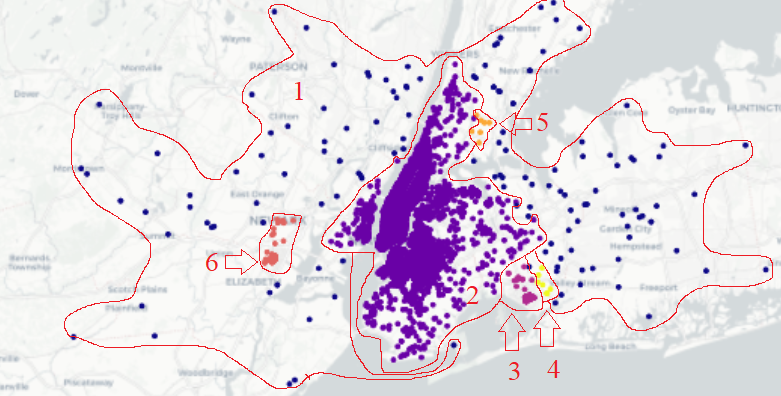

#### In contrast to the results obtained by the Kmeans model, the results of this model give more information. We obtain different clusters, determined by the density of points in a region of the New York map. With the help of these results, the company can better determine the territories with the most delivery points.

## Conclusion

####On the basis of all the results obtained, it would seems that **DBSCAN model is the most appropriate**. Indeed, the DBSCAN model allows to group points in space more easily according to their densities. Depending on the location of the points, this model is able to group them together and thus obtain a specific cluster. **Kmeans** will be more suitable **for data grouped in the shape of a ball**. If our data were significantly separated in a circle, the Kmeans model would be more suitable.